In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cluster-text-lastest/cluster_texts_lastest.json
/kaggle/input/font-path/Fahkwang-Medium.ttf
/kaggle/input/font-path/Kanit-Black.ttf
/kaggle/input/normalized-dict/normalized_dict_text.json


In [2]:
import json

In [ ]:
with open('/kaggle/input/cluster-text-lastest/cluster_texts_lastest.json', 'r') as f:
    cluster_texts = json.load(f)
print('done')

In [ ]:
!pip install pythainlp

In [ ]:
!pip install attacut

In [ ]:
import re
import nltk
import pythainlp
from pythainlp.tokenize import word_tokenize as thai_tokenize
from nltk.tokenize import word_tokenize as eng_tokenize
from nltk.corpus import stopwords
from pythainlp.corpus.common import thai_stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
stop_words_en = set(stopwords.words('english'))
stop_words_th = set(thai_stopwords())
lemmatizer = WordNetLemmatizer()

In [ ]:
preprocessed_tokens = {}

for cluster_id, text in cluster_texts.items():
    tokens_th = thai_tokenize(text, keep_whitespace=False)
    tokens_en = eng_tokenize(text)
    
    tokens = tokens_th + tokens_en  

    clean_tokens = []
    for token in tokens:
        token = token.lower()
        token = re.sub(r'[^\u0E00-\u0E7Fa-z]', '', token)  # Thai / Eng Keeping

        if not token:
            continue

        # English Checking
        if re.match(r'[a-z]+', token):
            if token not in stop_words_en:
                lemma = lemmatizer.lemmatize(token)
                clean_tokens.append(lemma)
        else:  # Thai Checking
            if token not in stop_words_th:
                clean_tokens.append(token)

    preprocessed_tokens[cluster_id] = clean_tokens

for cluster_id, tokens in preprocessed_tokens.items():
    print(f"\n=== Cluster {cluster_id} ===")
    print(tokens[:20])

In [ ]:
preprocessed_tokens

In [ ]:
len_dict = {key: len(values) for key, values in preprocessed_tokens.items()}
len_dict

In [ ]:
preprocessed_tokens

In [ ]:
def remove_single_char_words(cluster_dict):
    cleaned_dict = {}
    for cluster, words in preprocessed_tokens.items():
        cleaned_words = [word for word in words if len(word) > 1]
        cleaned_dict[cluster] = cleaned_words
    return cleaned_dict

In [ ]:
cleaned_dict = remove_single_char_words(preprocessed_tokens)
cleaned_dict

In [ ]:
len_dict = {k: len(v) for k, v in cleaned_dict.items()}
len_dict

In [ ]:
from textblob import TextBlob
from pythainlp.util import normalize as thai_normalize

def normalize_words(cluster_dict):
    def normalize_word(word):
        if word.isascii() and word.isalpha():
            corrected = str(TextBlob(word.lower()).correct())
            return corrected
        else:
            return thai_normalize(word)
    
    normalized_dict = {}
    for cluster, words in cluster_dict.items():
        normalized_words = [normalize_word(word) for word in words]
        normalized_dict[cluster] = normalized_words

    return normalized_dict

In [ ]:
normalized_dict = normalize_words(cleaned_dict)
normalized_dict

In [ ]:
with open('normalized_dict_text.json', 'w') as f:
    json.dump(normalized_dict, f)

print("Data saved successfully!")

# Session 2

In [2]:
import json

In [3]:
with open('/kaggle/input/normalized-dict/normalized_dict_text.json', 'r') as f:
    normalized_dict = json.load(f)

print('read done')

read done


In [4]:
normalized_dict

{'0': ['สร้าง',
  'รายได้',
  'เสริม',
  'บ้าน',
  'การสอน',
  'al',
  'โค้ด',
  'สมัคร',
  'union',
  'management',
  'candidate',
  'บี',
  'นา',
  'คม',
  'สมัคร',
  'โอ',
  'กาล',
  'นี',
  'กุมภาพันธ์',
  'รีบด่วน',
  'โดเมน',
  'com',
  'now',
  'sale',
  'fess',
  'up',
  'special',
  'offer',
  'end',
  'season',
  'sale',
  'discount',
  'item',
  'monday',
  'tuesday',
  'but',
  'shoe',
  'fipflop',
  'sale',
  'flat',
  'แห่',
  'ชาติ',
  'งานหนังสือ',
  'แห่งชาติ',
  'flash',
  'sake',
  'ship',
  'sairpods',
  'เริ่มต้น',
  'shone',
  'อัปเกรด',
  'เปน',
  'chromic',
  'shield',
  'ความทนทาน',
  'ผ่านการทดสอบ',
  'black',
  'trip',
  'com',
  'โปร',
  'ลด',
  'ไฟ',
  'ลุก',
  'สง',
  'รวบ',
  'โปร',
  'เถือ',
  'per',
  'week',
  'limited',
  'time',
  'pale',
  'le',
  'lifestyle',
  'best',
  'price',
  'big',
  'sale',
  'shop',
  'เปีด',
  'real',
  'estate',
  'agent',
  'โอกาส',
  'สร้าง',
  'รายได้',
  'หลัก',
  'แสน',
  'เดือน',
  'ครึ่ง',
  'ปี',
  'ฟรี',
  'side

In [11]:
for k in normalized_dict:
    normalized_dict[k] = ['grabfood' if word == 'graofood' else word for word in normalized_dict[k]]
    normalized_dict[k] = ['trial' if word == 'al' else word for word in normalized_dict[k]]

In [17]:
cl_1 = normalized_dict["0"].count('grabfood')
cl_2 = normalized_dict["1"].count('grabfood')

cl_1, cl_2, cl_1 + cl_2

(2, 38, 40)

In [18]:
with open('normalized_dictX2.json', 'w') as f:
    json.dump(normalized_dict, f)
print('write done')

write done


In [19]:
!pip install wordcloud

In [22]:
!pip install pythainlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 63.5 MB/s eta 0:00:00:00:0100:01


In [23]:
import pythainlp
from pythainlp import word_tokenize
from pythainlp.corpus import get_corpus # for getting stopwords

import wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import numpy as np
import re

In [37]:
font_path1 = '/kaggle/input/font-path/Kanit-Black.ttf'
font_path2 = '/kaggle/input/font-path/Fahkwang-Medium.ttf'

In [25]:
for k, v in normalized_dict.items():
    unique_types = set(type(t) for t in v)
    print(f'{k}: {unique_types}')

0: {<class 'str'>}
1: {<class 'str'>}


In [27]:
from collections import Counter
import re
import random

In [29]:
def my_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    cool_dark_colors = [
        '#0D1B2A',  # Dark Navy Blue
        '#1B263B',  # Deep Blue
        '#415A77',  # Cool Steel
        '#778DA9',  # Muted Blue Gray
        '#274C77',  # Deep Royal
        '#3E5C76',  # Steely Blue
        '#4361EE',  # Bright Blue
        '#4895EF',  # Soft Azure
        '#52796F',  # Dark Teal
        '#2B2D42'   # Charcoal
    ]
    return random.choice(cool_dark_colors)

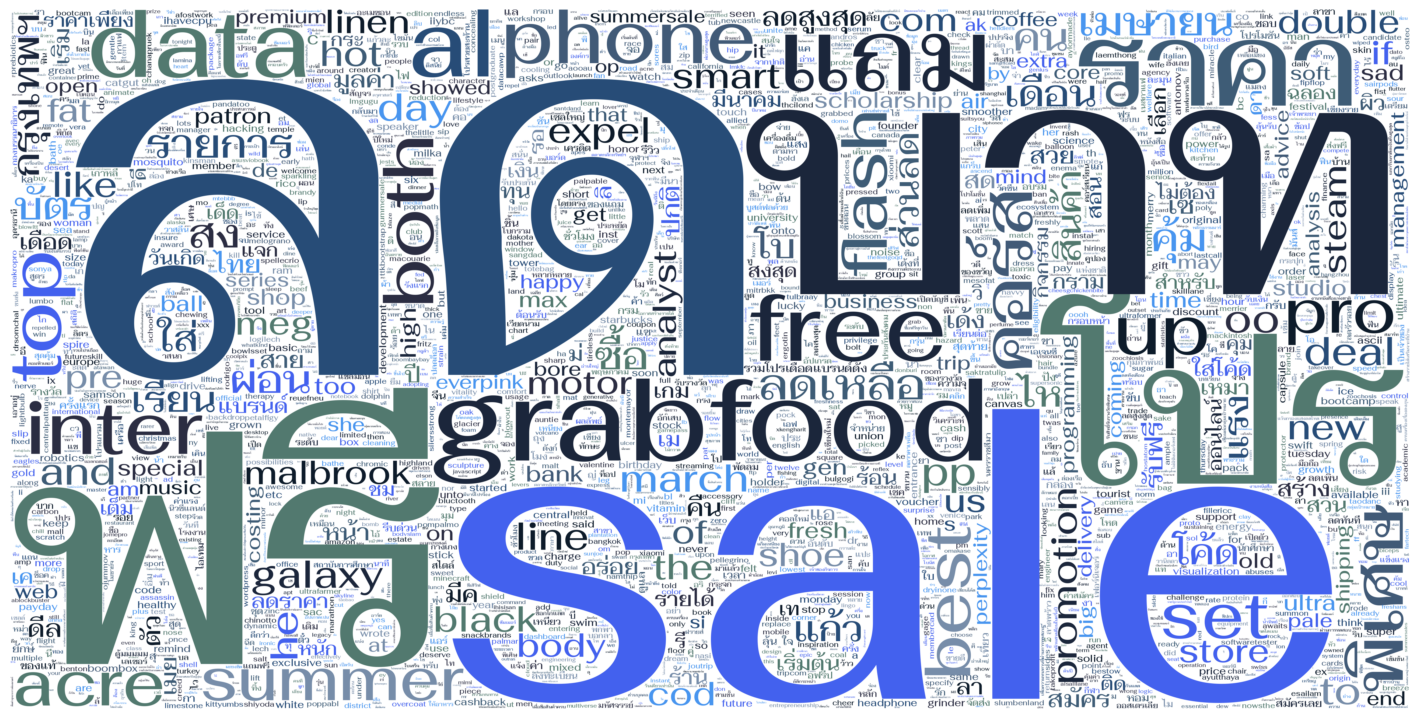

In [72]:
all_text = ' '.join([' '.join(v) if isinstance(v, list) else v for v in normalized_dict.values()])
words = re.findall(r'[\wก-๙]+', all_text)
word_freq = Counter(words)
wordcloud = WordCloud(
    font_path=font_path2,
    regexp=r'[\wก-๙]+',
    background_color='white',
    color_func=my_color_func,        
    width=3000,                     # ความละเอียดสูงขึ้น
    height=1500,
    max_words=5000,                 # แสดงคำเยอะขึ้น
    prefer_horizontal=0.9,          # ส่วนใหญ่เป็นแนวนอน
    relative_scaling=0.5,           # ให้คำเล็กเห็นได้มากขึ้น
    scale=2,                        # render ชัดขึ้น
    min_font_size=4,
    normalize_plurals=False,        # ไม่รวม sale/sales
    random_state=42                 # ทำให้ได้ผลเหมือนเดิมทุกครั้ง
).generate_from_frequencies(word_freq)

# 5. แสดงผล
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [73]:
wordcloud.to_file("market_words.png")

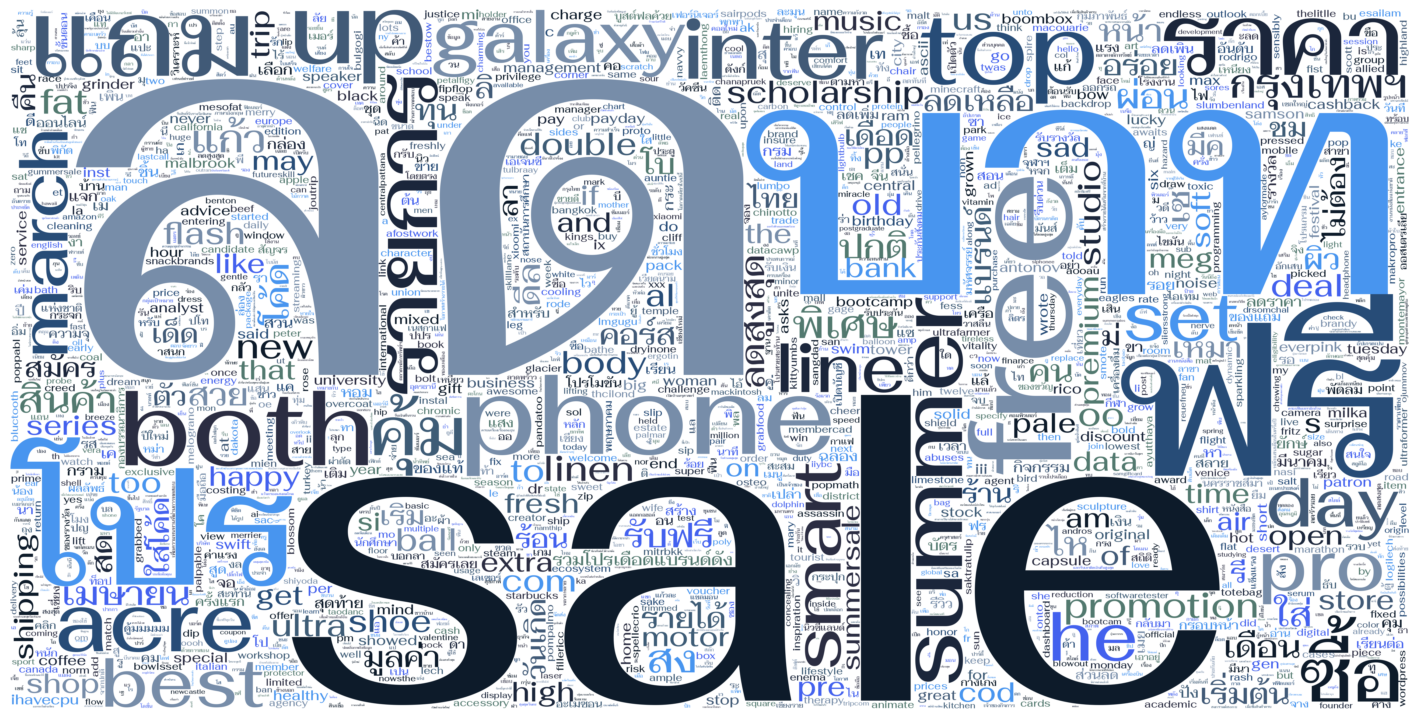

In [77]:
cluster_0_values = normalized_dict.get("0", [])
all_text = ' '.join(cluster_0_values) if isinstance(cluster_0_values, list) else cluster_0_values
words = re.findall(r'[\wก-๙]+', all_text)
word_freq = Counter(words)
wordcloud = WordCloud(
    font_path=font_path2,
    regexp=r'[\wก-๙]+',
    background_color='white',
    color_func=my_color_func,
    width=3000,
    height=1500,
    max_words=5000,
    prefer_horizontal=0.9,
    relative_scaling=0.5,
    scale=2,
    min_font_size=4,
    normalize_plurals=False,
    random_state=42
).generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [78]:
wordcloud.to_file("market_words_cluster0.png")

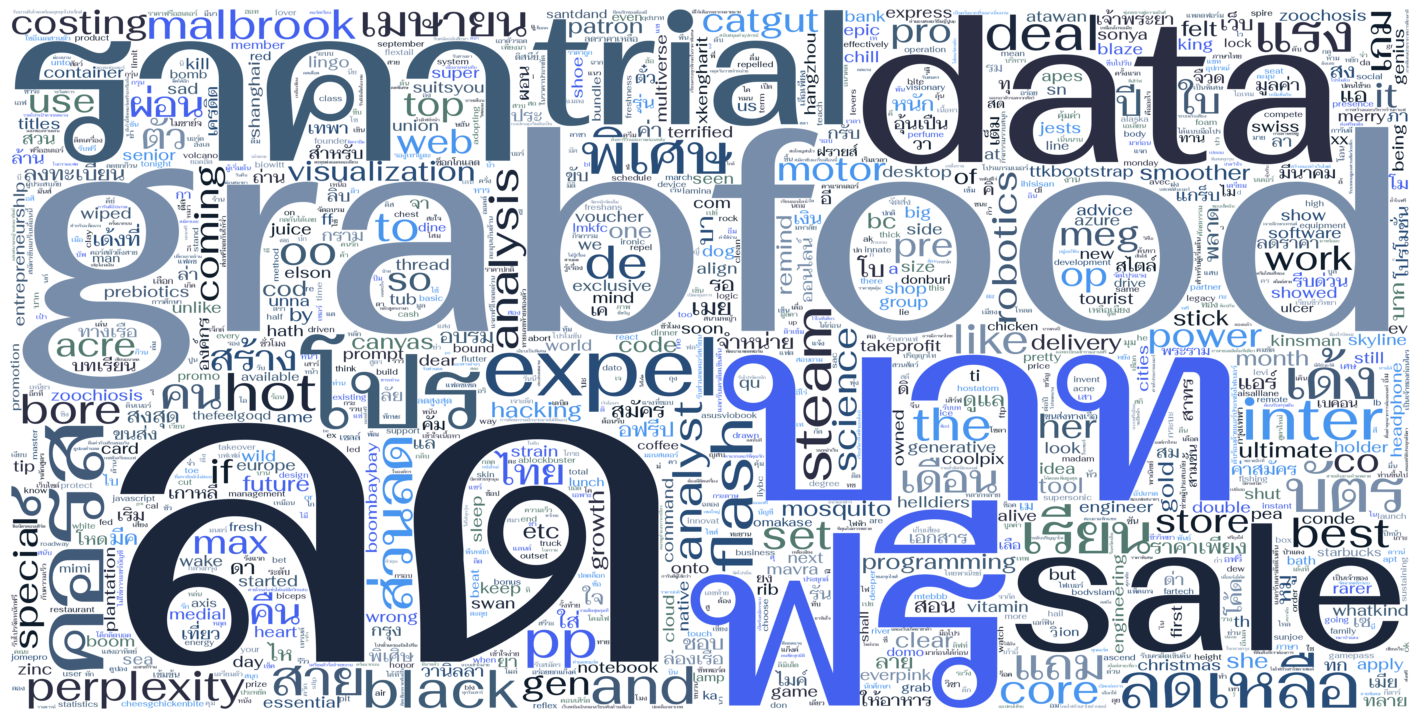

In [30]:
cluster_1_values = normalized_dict.get("1", [])
all_text = ' '.join(cluster_1_values) if isinstance(cluster_1_values, list) else cluster_1_values
words = re.findall(r'[\wก-๙]+', all_text)
word_freq = Counter(words)
wordcloud = WordCloud(
    font_path=font_path2,
    regexp=r'[\wก-๙]+',
    background_color='white',
    color_func=my_color_func,
    width=3000,
    height=1500,
    max_words=5000,
    prefer_horizontal=0.9,
    relative_scaling=0.5,
    scale=2,
    min_font_size=4,
    normalize_plurals=False,
    random_state=42
).generate_from_frequencies(word_freq)

# 6. แสดงผล
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
wordcloud.to_file("market_words_cluster1.png")

In [32]:
def generate_word_freq(cluster_values):
    all_text = ' '.join(cluster_values) if isinstance(cluster_values, list) else cluster_values
    words = re.findall(r'[\wก-๙]+', all_text)
    return Counter(words)

In [40]:
from matplotlib import font_manager
font_properties = font_manager.FontProperties(fname=font_path2)

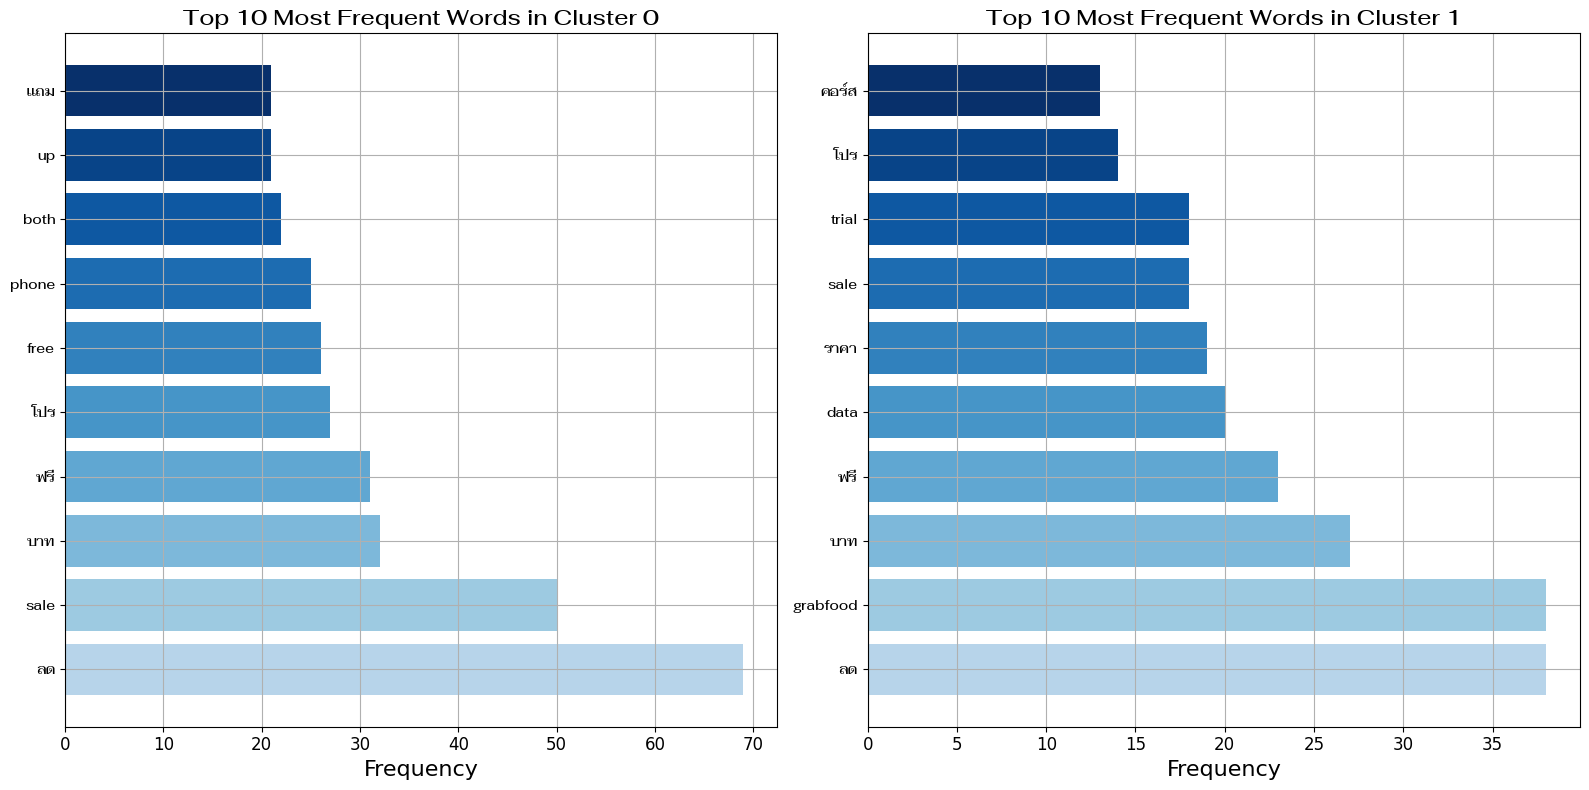

In [41]:
word_freq_cluster_0 = generate_word_freq(cluster_0_values)
word_freq_cluster_1 = generate_word_freq(cluster_1_values)

top_10_cluster_0 = word_freq_cluster_0.most_common(10)
top_10_cluster_1 = word_freq_cluster_1.most_common(10)

words_0, freqs_0 = zip(*top_10_cluster_0)
words_1, freqs_1 = zip(*top_10_cluster_1)

plt.figure(figsize=(16, 8))
# First subplot - Cluster 0
plt.subplot(1, 2, 1)
plt.barh(words_0, freqs_0, color=plt.cm.Blues(np.linspace(0.3, 1, 10)))
plt.xlabel('Frequency', fontsize=16)
plt.grid(True)
plt.title('Top 10 Most Frequent Words in Cluster 0', fontproperties=font_properties, fontsize=16)
plt.gca().tick_params(axis='both', labelsize=12)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(font_properties)

# Second subplot - Cluster 1
plt.subplot(1, 2, 2)
plt.barh(words_1, freqs_1, color=plt.cm.Blues(np.linspace(0.3, 1, 10)))
plt.xlabel('Frequency', fontsize=16)
plt.title('Top 10 Most Frequent Words in Cluster 1', fontproperties=font_properties, fontsize=16)
plt.gca().tick_params(axis='both', labelsize=12)
for label in plt.gca().get_yticklabels():
    label.set_fontproperties(font_properties)

plt.grid(True)
plt.tight_layout()
plt.savefig("word_frequency_clusters.png", dpi=400, bbox_inches='tight')
plt.show()

In [46]:
with open('word_freq_cluster_0.json', 'w') as f:
    json.dump(word_freq_cluster_0, f)
print('done')

done
